# Phase 3 Data Science Training Notebook

In [260]:
import pandas as pd
import numpy as np

## Exploratory Data Analysis

In [261]:
# Assume tar.gz file to be extracted at project directory.
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Data Processing

In [262]:
data_batch_1 = unpickle("data_batch_1")
data_batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [263]:
data_batch_1[b'batch_label']

b'training batch 1 of 5'

In [264]:
print(len(data_batch_1[b'labels']))
print(max(data_batch_1[b'labels']))
print(min(data_batch_1[b'labels']))
labels = data_batch_1[b'labels']

10000
9
0


In [265]:
indexForEach = []
for i in range (10):
    temp = []
    for idx, label in enumerate(labels):
        if len(temp) == 5:
            indexForEach.append(temp)
            break
        if label == i:
            temp.append(idx)

indexForEach

[[29, 30, 35, 49, 77],
 [4, 5, 32, 44, 45],
 [6, 13, 18, 24, 41],
 [9, 17, 21, 26, 33],
 [3, 10, 20, 28, 34],
 [27, 40, 51, 56, 70],
 [0, 19, 22, 23, 25],
 [7, 11, 12, 37, 43],
 [8, 62, 69, 92, 100],
 [1, 2, 14, 15, 16]]

In [266]:
data_batch_1[b'data'].shape

(10000, 3072)

In [267]:
import matplotlib.pyplot as plt

def getFiveImages(toShow, index):
    sampleImages = []
    for i in range (5):
        temp =  data_batch_1[b'data'][toShow[i]]
        temp = temp.reshape(3,32,32)
        temp = temp.transpose(1,2,0)
        sampleImages.append(temp)
    fig, axs = plt.subplots(1, 5, constrained_layout=True)
    fig.suptitle("Label" + index, fontsize=16)
    fig.tight_layout()
    fig.set_figwidth(15)
    for j in range (5):
        axs[j].imshow(sampleImages[j])



C:\Users\AKLbc\AppData\Local\Temp\ipykernel_7104\4033545415.py:12: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


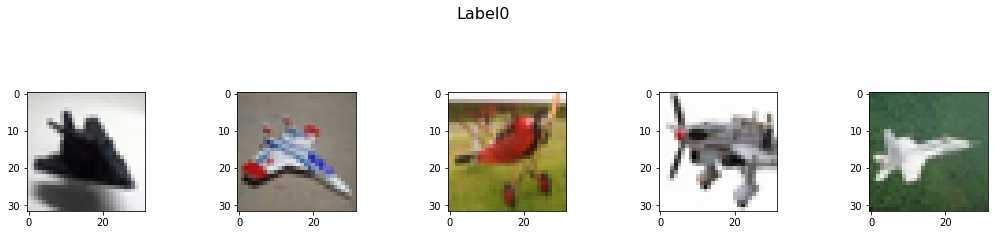

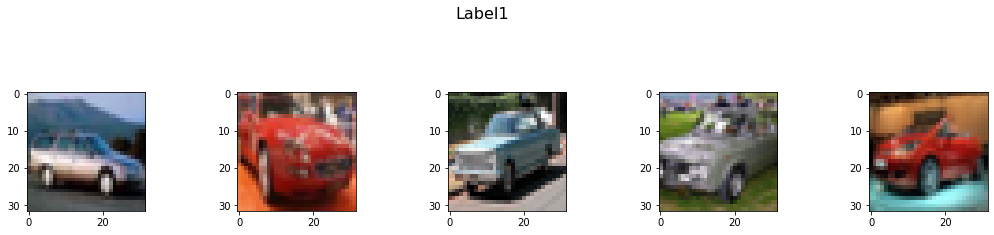

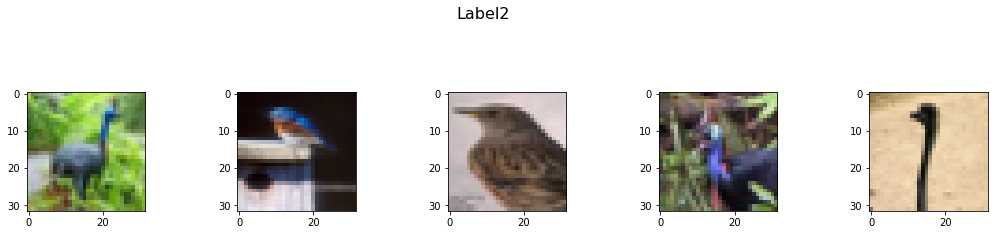

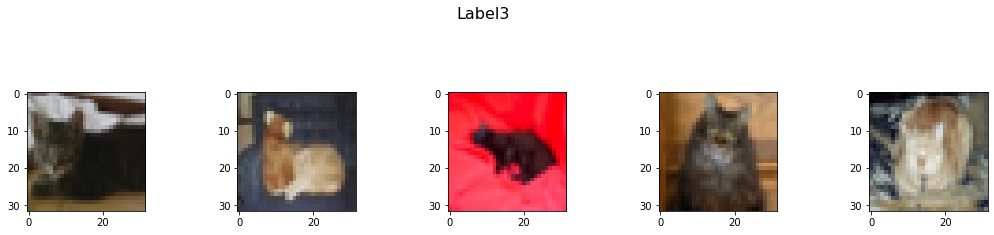

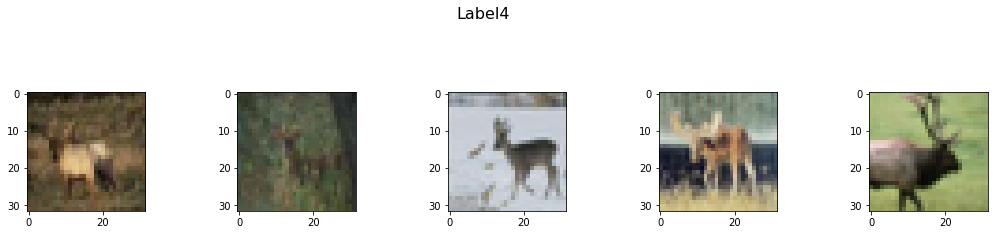

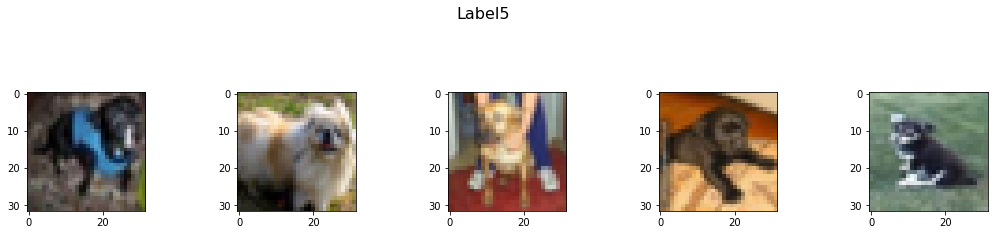

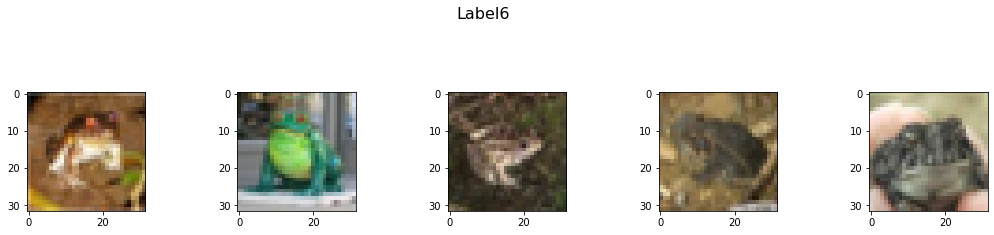

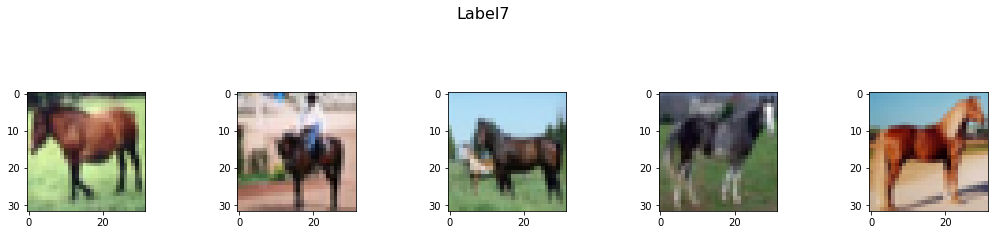

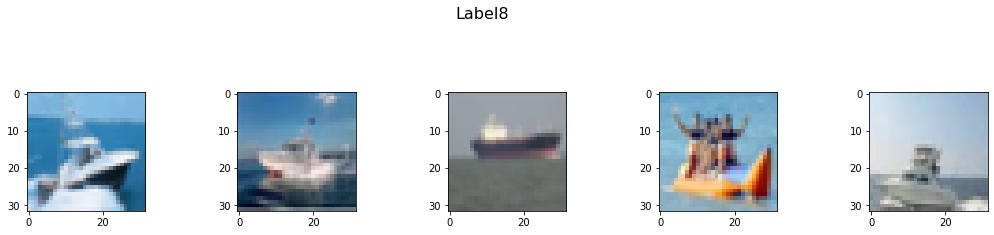

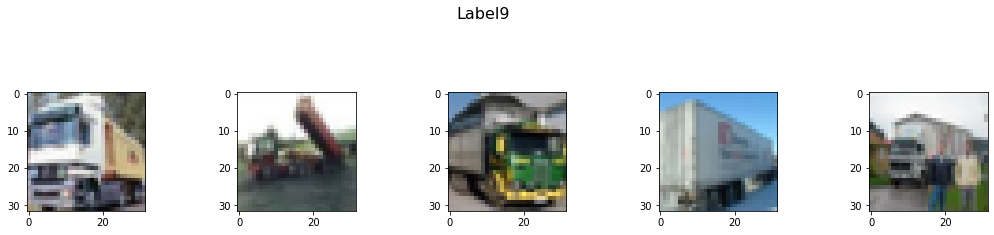

In [268]:
for i in range (10):
    getFiveImages(indexForEach[i], str(i))

# Data Modelling

In [269]:
import tensorflow as tf
from tensorflow.keras import Input, layers, Sequential, optimizers, losses, callbacks
from datetime import datetime

In [270]:
def generateModel():
    """
    Make a Keras Sequential Model.
    Feel free to change the layout of the layers.

    Read more about keras here: https://keras.io/api/
    Tensorflow setup adapted here: https://www.tensorflow.org/tutorials/quickstart/beginner
    """
    model = Sequential(name="Image_Recognition_Model")
    model.add(Input(shape=(3,32,32))) # Input layer.

    model.add(layers.Rescaling(scale=1./255, name="Normaliser")) # Example pre-processing layer.

    model.add(layers.Dense(40, activation="relu")) # Example Hidden Layer 1. Has 40 Nodes.
    model.add(layers.Dense(25, activation="sigmoid")) # Example Hidden Layer 2. Has 25 Nodes.
    model.add(layers.Dense(15, activation="tanh")) # Example Hidden Layer 3. Has 15 Nodes.

    model.add(layers.Dense(1, activation="sigmoid", name="Output_Probability")) # Output layer.

    model.compile(
        optimizer=optimizers.SGD(learning_rate=0.01),
        loss=losses.MeanAbsoluteError(),
        metrics=['accuracy']
    )

    return model